In [3]:
# pip install kaggle

In [4]:
#!kaggle competitions download -c GiveMeSomeCredit

https://github.com/Tenzin-Yangzom-6839/GiveMeSomeCredit

In [5]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the training data
training_data_path = 'C:/Users/tenzi/OneDrive/Desktop/Data Analyst Portfolio Data/GiveMeSomeCredit/cs-training.csv'
training_data = pd.read_csv(training_data_path)



In [7]:
# Display the first few rows of the dataset
training_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### <b>Training Data Overview</b>
The dataset cs-training.csv contains 150,000 entries and 12 columns:

- Unnamed: 0: An index column.
- SeriousDlqin2yrs: Indicates if the person experienced 90 days past due delinquency or worse (1 if true, 0 if false).
- RevolvingUtilizationOfUnsecuredLines: The total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
- age: The age of the borrower in years.
- NumberOfTime30-59DaysPastDueNotWorse: Number of times the borrower has been 30-59 days past due but no worse in the last 2 years.
- DebtRatio: Monthly debt payments, alimony, living costs divided by monthy gross income.
- MonthlyIncome: Monthly income of the borrower.
- NumberOfOpenCreditLinesAndLoans: Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards).
- NumberOfTimes90DaysLate: Number of times the borrower has been 90 days or more past due.
- NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit.
- NumberOfTime60-89DaysPastDueNotWorse: Number of times the borrower has been 60-89 days past due but no worse in the last 2 years.
- NumberOfDependents: Number of dependents in family excluding themselves (spouse, children, etc.).

There are some missing values in the MonthlyIncome and NumberOfDependents columns.

## <b> EDA (Exploratory Data Analysis)</b>

In [9]:
# Load the data dictionary
data_dictionary_path = 'C:/Users/tenzi/OneDrive/Desktop/Data Analyst Portfolio Data/GiveMeSomeCredit/Data Dictionary.xls'
data_dictionary = pd.read_excel(data_dictionary_path)

# Display the contents of the data dictionary
data_dictionary.head(15)


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [10]:
# Check for missing values
missing_values = training_data.isnull().sum()

# Basic statistics of the dataset
basic_stats = training_data.describe()

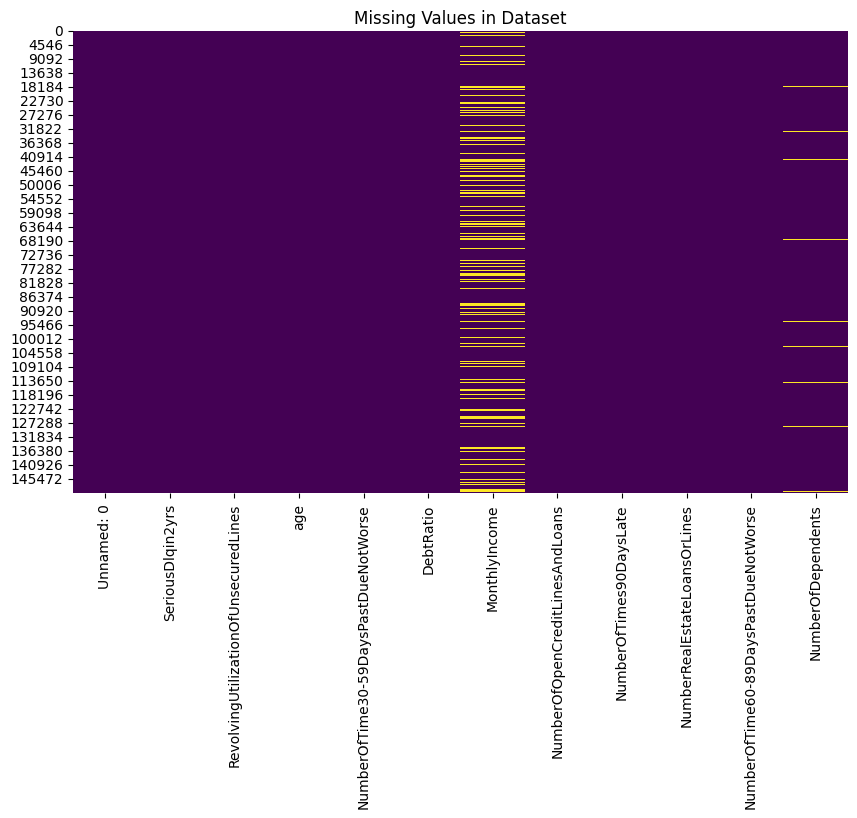

In [11]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(training_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

In [12]:
pd.DataFrame({"Column": missing_values.index, 
              "Number of Null Values": missing_values.values,
              "Proportion": missing_values.values / len(training_data) })

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,0,0.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,29731,0.198207
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


### Null Values in the training data

- MonthlyIncome have 29731 (19.82%) null values
- NumberOfDependents 3924 (2.61%) null values

Observation: It looks like those without a valid number of dependents do no have a valid income

In [13]:
# Basic Statistic of the dataset
basic_stats

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Data Cleaning

In [14]:
training_data.shape

(150000, 12)

In [15]:
training_data.nunique()

Unnamed: 0                              150000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [16]:
# Drop unnecessary columns.
training_data.drop(columns='Unnamed: 0',inplace=True)

In [17]:
training_data.duplicated().sum()

609

In [18]:
training_data.drop_duplicates(inplace=True)

As seen from above, there are missing values in few columns

Will use KNNImputer to fill the missing values

In [19]:
from sklearn.impute import KNNImputer

# Create KNNImputer instance to fill missing values
imputer = KNNImputer(n_neighbors=5)  

In [20]:
# Fit and transform the imputer on the data
columns_to_impute = ['MonthlyIncome', 'NumberOfDependents']  # List of columns to impute
training_data[columns_to_impute] = imputer.fit_transform(training_data[columns_to_impute])

In [21]:
# Identify if there are any missing values in the dataset.
training_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### Defaulted: 
If a person has been 90 days past due on any credit account within the two-year period, they are considered to have defaulted. In the dataset, this is represented by the variable SeriousDlqin2yrs.

- SeriousDlqin2yrs = 1: The person has defaulted (experienced financial distress).
- SeriousDlqin2yrs = 0: The person has not defaulted.

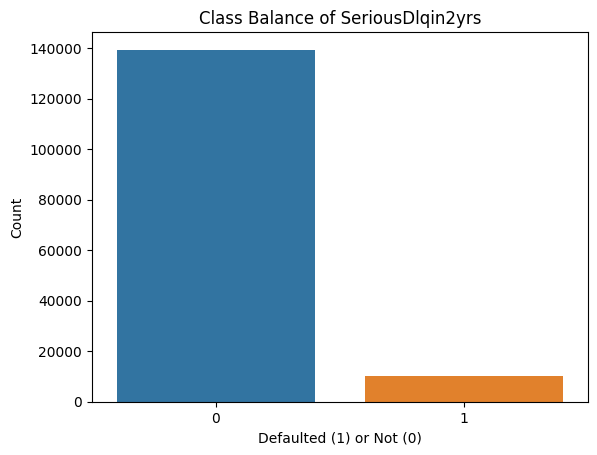

In [22]:
# Visualize the balance of classes
sns.countplot(x="SeriousDlqin2yrs", data=training_data)
plt.title("Class Balance of SeriousDlqin2yrs")
plt.xlabel("Defaulted (1) or Not (0)")
plt.ylabel("Count")
plt.show()

Here, we have imbalanced target class

In [23]:
# Calculate and print the proportion of people who defaulted
default_proportion = training_data["SeriousDlqin2yrs"].mean()
print(f"Proportion of People Who Defaulted: {default_proportion:.5f}")

Proportion of People Who Defaulted: 0.06700


It shows 6% of the sample is defaulted.

In [24]:
# Basic Statistic of the dataset
basic_stats

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


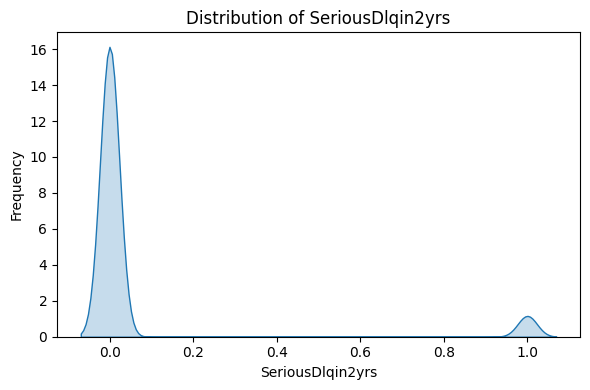

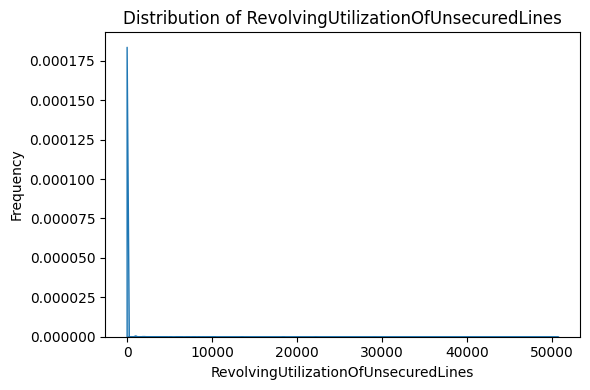

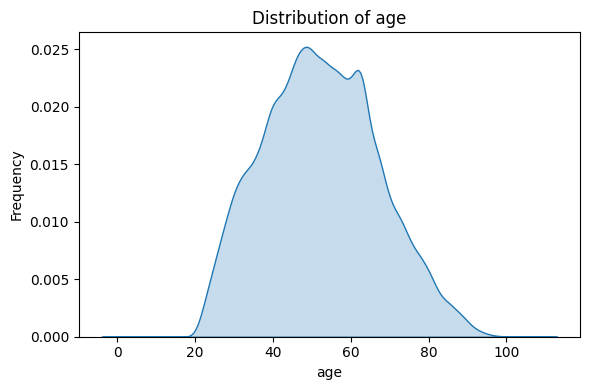

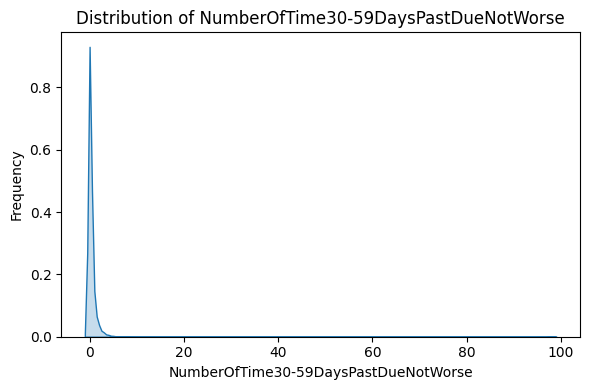

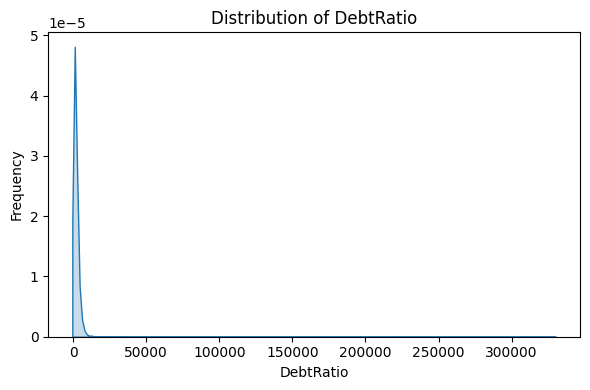

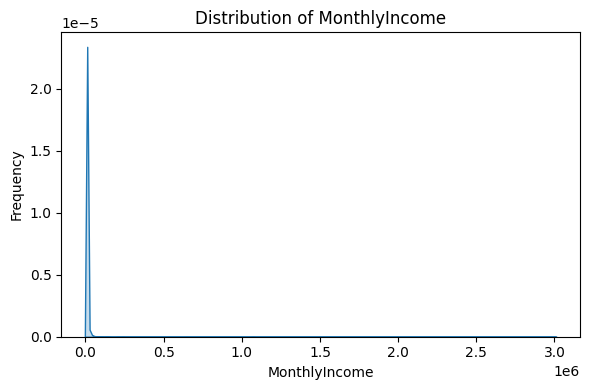

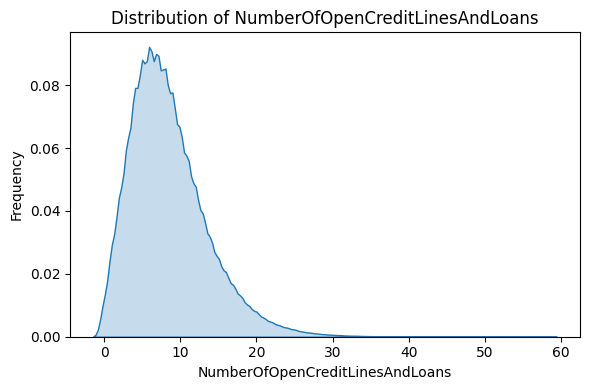

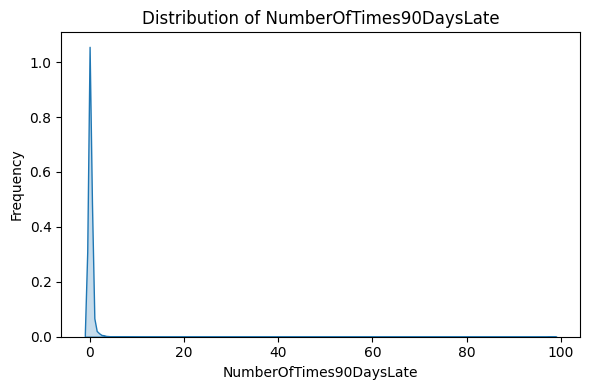

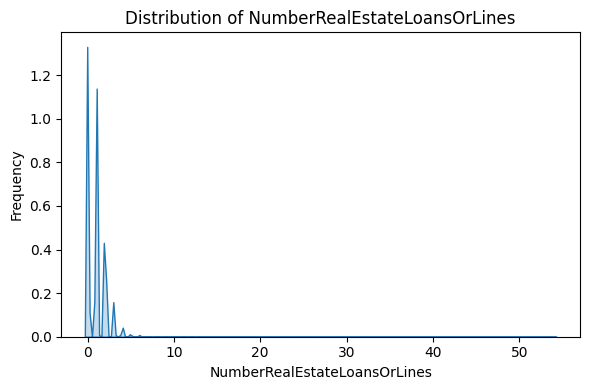

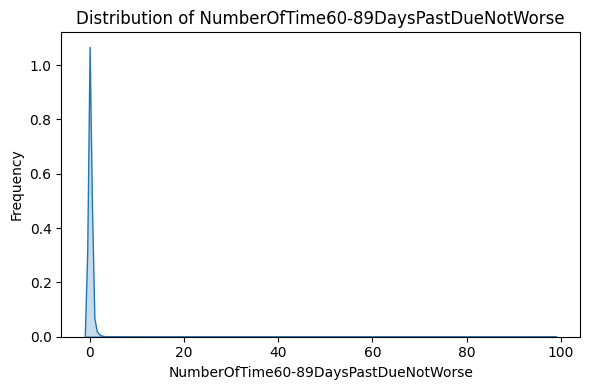

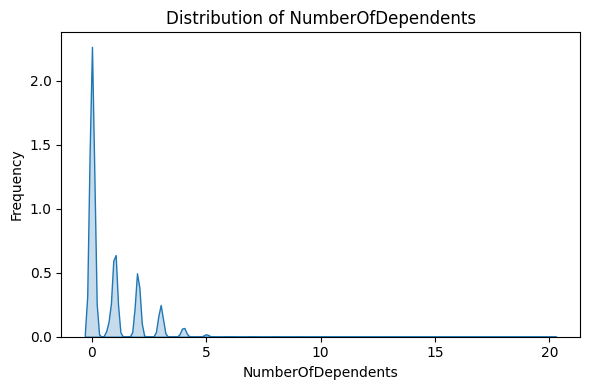

In [25]:
# List of numerical columns
numerical_columns = training_data.select_dtypes(include=['number']).columns

# Create density plots for numerical columns (kde -kernel density estimate)
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=training_data, x=col, fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

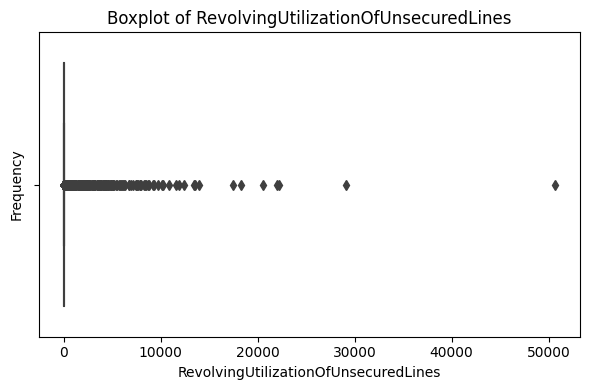

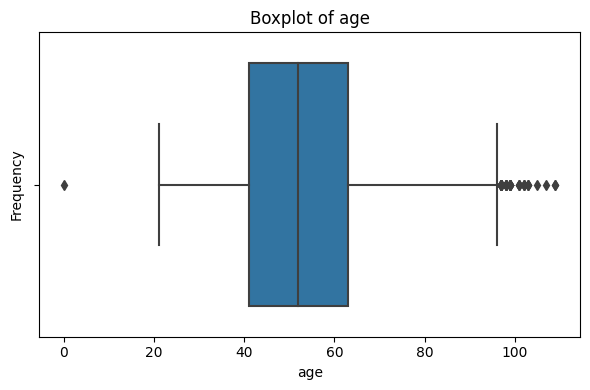

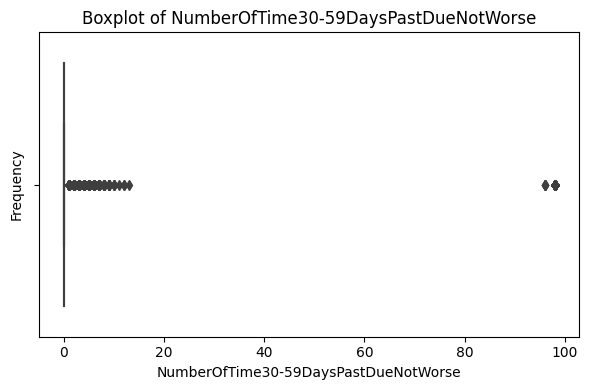

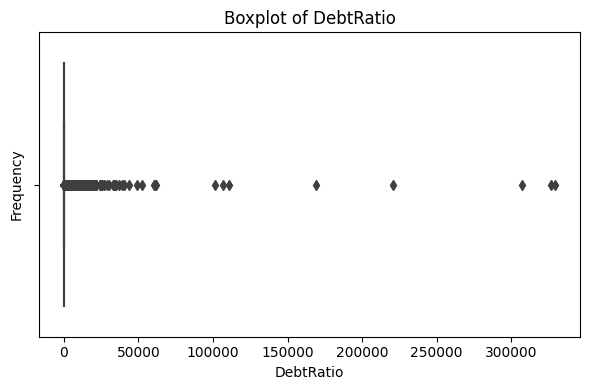

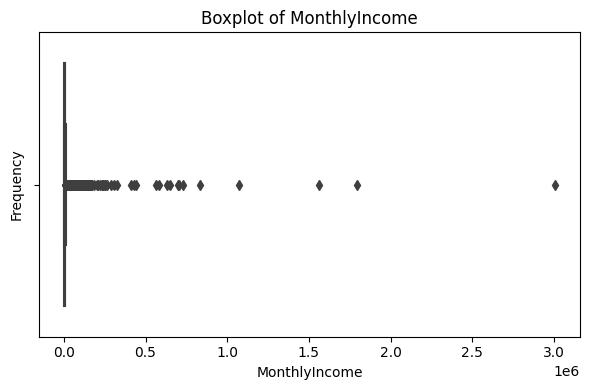

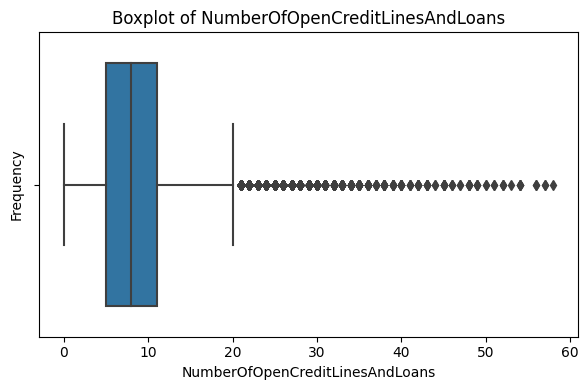

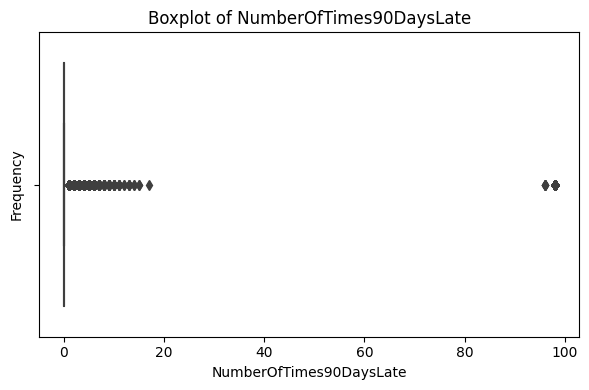

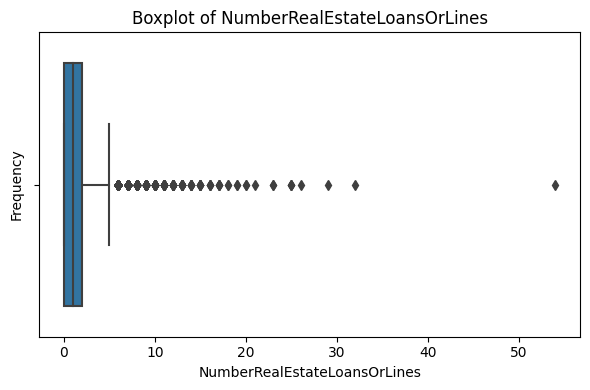

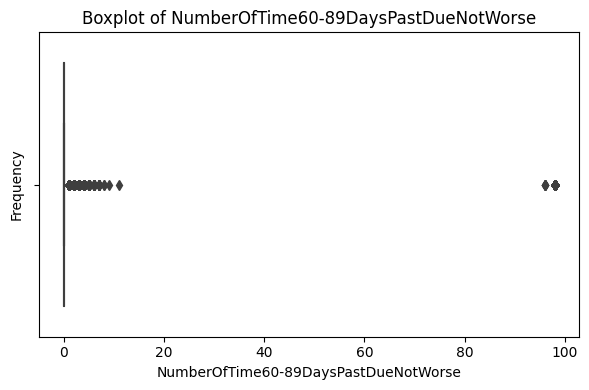

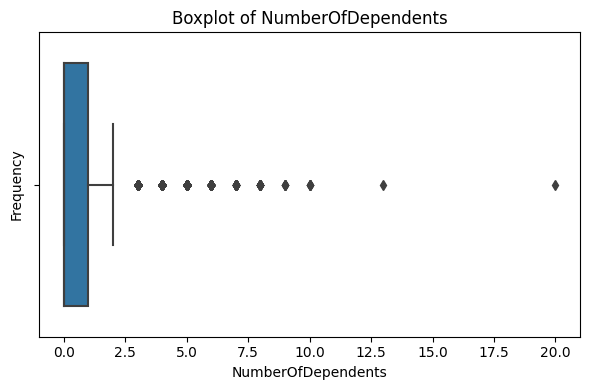

In [26]:
# List of numerical columns
numerical_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

# Create box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=training_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

- Serious Delinquency Rate: The mean value of the 'SeriousDlqin2yrs' variable is approximately 0.067, indicating that around 6.7% of borrowers in the dataset experienced serious delinquency (90 days or worse) in the past two years.

- Revolving Utilization of Unsecured Lines: The 'RevolvingUtilizationOfUnsecuredLines' variable has a wide range of values, with a mean of approximately 6.07. This suggests that, on average, borrowers have a high utilization of unsecured lines of credit relative to their credit limits.

- Age Distribution: The average age of borrowers in the dataset is approximately 52.31 years. The age range varies from a minimum of 0 years (potentially indicating missing or inccorrect data) to a maximum of 109 years.

- Past Due Payments: The 'NumberOfTime30-59DaysPastDueNotWorse' variable has a mean of approximately 0.39, suggesting that, on average, borrowers have a low incidence of being 30-59 days past due in the last two years. However, the maximum value is 98, which seems anomalous and may require further investigation.

- Debt Ratio: The 'DebtRatio' variable has a wide range of values, with a mean of approximately 354.44. This could indicate that, on average, borrowers have a significant amount of debt relative to their monthly gross income.

- Monthly Income: The 'MonthlyIncome' variable has a mean of approximately 6,670.22. However, there appears to be missing data as the count is lower than the total count of rows in the dataset.

- Number of Open Credit Lines and Loans: The 'NumberOfOpenCreditLinesAndLoans' variable has a mean of approximately 8.45, indicating that, on average, borrowers have around 8-9 open credit lines and loans.

- Number of Times 90+ Days Late: The 'NumberOfTimes90DaysLate' variable has a mean of approximately 0.24, suggesting that, on average, borrowers have a low incidence of being 90 days or more past due. Similar to 'NumberOfTime30-59DaysPastDueNotWorse', there are some high outliers (e.g., maximum value of 98) that require scrutiny.

- Number of Real Estate Loans or Lines: The 'NumberRealEstateLoansOrLines' variable has a mean of approximately 1.02, indicating that, on average, borrowers have about one real estate loan or line of credit.

- Number of Times 60-89 Days Late: The 'NumberOfTime60-89DaysPastDueNotWorse' variable has a mean of approximately 0.21, suggesting that, on average, borrowers have a low incidence of being 60-89 days past due.

- Number of Dependents: The 'NumberOfDependents' variable has a mean of approximately 0.76, indicating that, on average, borrowers have fewer than one dependent. There is also a high outlier with a value of 20, which may need further investigation.

In [27]:
# copying the training data to df variable
df = training_data.copy()
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Overall default rate is 6.7%

In [28]:
# Calculate the overall default rate
total_borrowers = len(training_data)
default_borrowers = len(training_data[training_data['SeriousDlqin2yrs'] == 1])
default_rate = (default_borrowers / total_borrowers) * 100
print(f"The overall default rate in the dataset is: {default_rate:.2f}%")

The overall default rate in the dataset is: 6.70%


In [29]:
defaulted = training_data['SeriousDlqin2yrs'].value_counts()
defaulted

SeriousDlqin2yrs
0    139382
1     10009
Name: count, dtype: int64

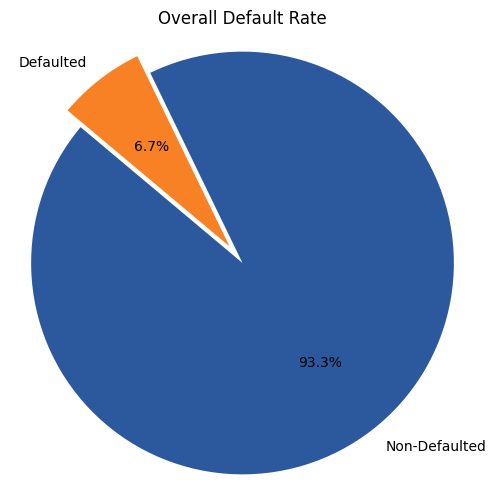

In [30]:
# pie chart
labels = ['Non-Defaulted', 'Defaulted']
sizes = [100 - default_rate, default_rate]
explode = (0, 0.1)  # To explode the 'Defaulted' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels,colors=['#2C599D','#F98125'], autopct='%1.1f%%' , startangle=140)
plt.title('Overall Default Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Defaulted borrowers based on age ranges

In [31]:
# Define custom age bins
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100,110]

# Categorize age into custom bins
training_data['age_group'] = pd.cut(training_data['age'], bins=age_bins)

# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
defaulted_borrowers = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Convert the 'age_group' Interval objects to strings
defaulted_borrowers['age_group'] = defaulted_borrowers['age_group'].astype(str)

# Count the defaulted borrowers in each age group
age_range_counts = defaulted_borrowers['age_group'].value_counts().reset_index()
age_range_counts.columns = ['Age Range', 'Count']
age_range_counts

C:\Users\tenzi\AppData\Local\Temp\ipykernel_55352\630855393.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted_borrowers['age_group'] = defaulted_borrowers['age_group'].astype(str)


,Age Range,Count
0,"(40, 50]",2893
1,"(30, 40]",2387
2,"(50, 60]",2145
3,"(20, 30]",1234
4,"(60, 70]",952
5,"(70, 80]",298
6,"(80, 90]",89
7,"(90, 100]",10
8,"(100, 110]",1


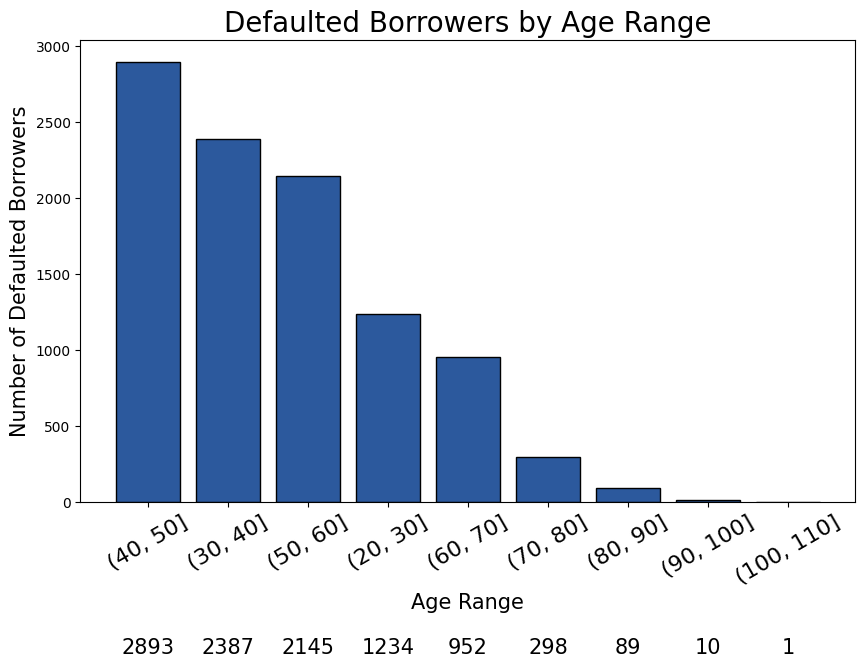

In [32]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_range_counts['Age Range'], age_range_counts['Count'],color='#2C599D',edgecolor="k",linewidth=1)
plt.xlabel('Age Range',fontsize=15)
plt.ylabel('Number of Defaulted Borrowers',fontsize=15)
plt.title('Defaulted Borrowers by Age Range',fontsize=20)
plt.xticks(fontsize=16,rotation=30)
for k,v in age_range_counts['Count'].items():
    plt.text(k,-1000, str(v), fontsize=15,color='k', horizontalalignment='center')
plt.show()

Defaulted borrowers based on Number Of Dependents

In [33]:
# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
defaulted_borrowers = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Group by the number of dependents and count the defaulted borrowers in each group
dependent_counts = defaulted_borrowers['NumberOfDependents'].value_counts().reset_index()
dependent_counts.columns = ['NumberOfDependents', 'Count']
dependent_counts

,NumberOfDependents,Count
0,0.000000,5079
1,1.000000,1935
2,2.000000,1584
3,3.000000,837
4,4.000000,297
5,0.759863,178
6,5.000000,68
7,6.000000,24
8,7.000000,5
9,8.000000,2


In [34]:
# Define a tolerance value for approximate comparison
tolerance = 1e-6  
# Identify and drop the row with a value close to 0.759863
dependent_counts = dependent_counts[abs(dependent_counts['NumberOfDependents'] - 0.759863) > tolerance]
dependent_counts = dependent_counts.reset_index(drop=True)
dependent_counts

,NumberOfDependents,Count
0,0.0,5079
1,1.0,1935
2,2.0,1584
3,3.0,837
4,4.0,297
5,5.0,68
6,6.0,24
7,7.0,5
8,8.0,2


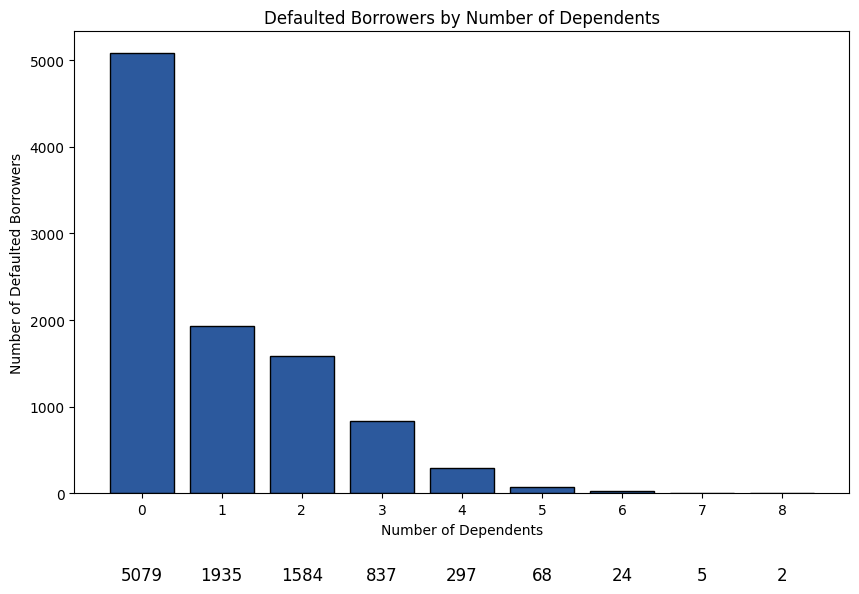

In [35]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(dependent_counts['NumberOfDependents'], dependent_counts['Count'],color='#2C599D',edgecolor='k')
plt.xlabel('Number of Dependents')
plt.ylabel('Number of Defaulted Borrowers')
plt.title('Defaulted Borrowers by Number of Dependents')
plt.xticks(dependent_counts['NumberOfDependents'])
for k,v in dependent_counts['Count'].items():
    plt.text(k,-1000, str(v), fontsize=12,color='k', horizontalalignment='center')
plt.show()

Defaulted borrowers based on MonthlyIncome

- To see if the borrowers with low monthly income are more likely to experience financial distress.

In [36]:
# Define custom monthly income bins with labels
income_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 25000, 30000, 35000, 40000, 50000]
income_labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000-12000', '12000-14000',
                 '14000-16000', '16000-18000', '18000-20000', '20000-25000', '25000-30000', '30000-35000',
                 '35000-40000', '40000-50000']

# Categorize monthly income into custom bins with labels
training_data['income_group'] = pd.cut(training_data['MonthlyIncome'], bins=income_bins, labels=income_labels)

# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
defaulted_borrowers = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Count the defaulted borrowers in each income group
income_range_counts = defaulted_borrowers['income_group'].value_counts().reset_index()
income_range_counts.columns = ['Income Range', 'Count']
income_range_counts

,Income Range,Count
0,2000-4000,3799
1,4000-6000,2105
2,6000-8000,1453
3,0-2000,947
4,8000-10000,842
5,10000-12000,309
6,12000-14000,167
7,14000-16000,113
8,16000-18000,60
9,20000-25000,50


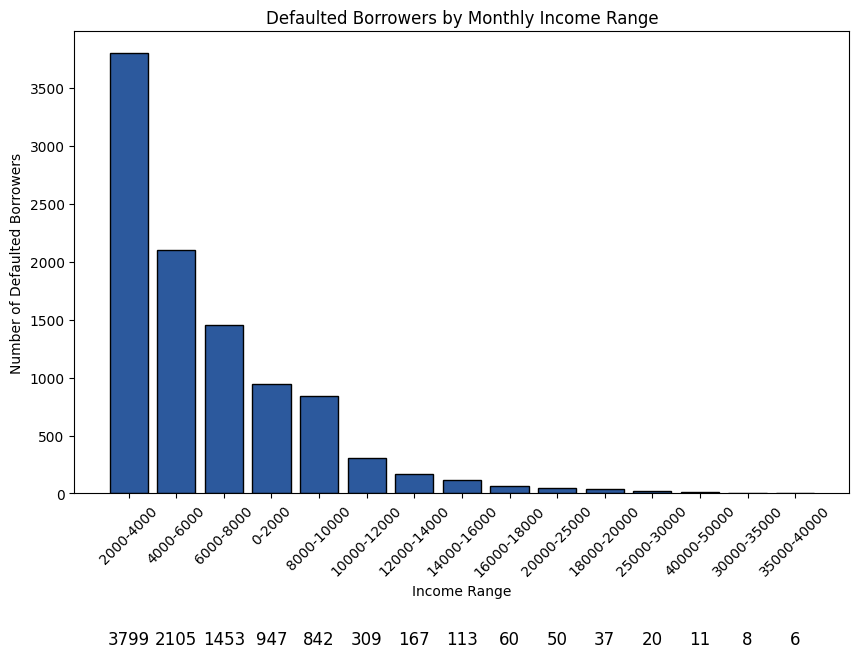

In [37]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(income_range_counts['Income Range'], income_range_counts['Count'],color='#2C599D',edgecolor='k')
plt.xlabel('Income Range')
plt.ylabel('Number of Defaulted Borrowers')
plt.title('Defaulted Borrowers by Monthly Income Range')
plt.xticks(rotation=45)
for k,v in income_range_counts['Count'].items():
    plt.text(k,-1300, str(v), fontsize=12,color='k', horizontalalignment='center')
plt.show()

Are borrowers who are 30-59 days past due on their payments likely to face serious delinquency?

In [39]:
# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
serious_delinquency_30 = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Group by the number of dependents and count the defaulted borrowers in each group
probability_by_past_due_30 = serious_delinquency_30['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().reset_index()
probability_by_past_due_30.columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'Count']
probability_by_past_due_30

,NumberOfTime30-59DaysPastDueNotWorse,Count
0,0,5035
1,1,2409
2,2,1219
3,3,618
4,4,318
5,5,154
6,98,132
7,6,74
8,7,28
9,8,8


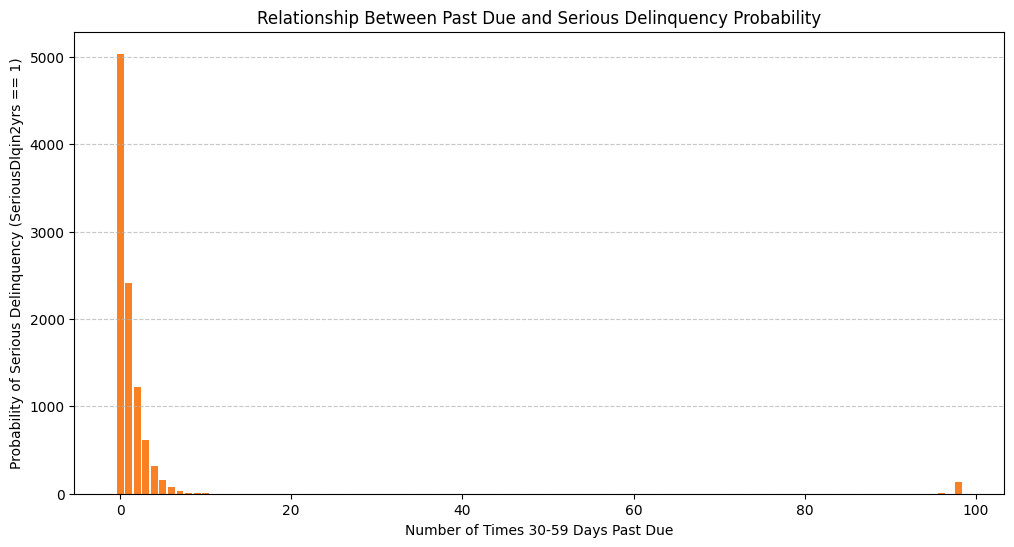

In [41]:
# Create a bar chart to visualize the relationship
plt.figure(figsize=(12, 6))
plt.bar(probability_by_past_due_30['NumberOfTime30-59DaysPastDueNotWorse'], probability_by_past_due_30['Count'],color='#F98125')
plt.xlabel('Number of Times 30-59 Days Past Due')
plt.ylabel('Probability of Serious Delinquency (SeriousDlqin2yrs == 1)')
plt.title('Relationship Between Past Due and Serious Delinquency Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Are borrowers who are 60-89 days past due on their payments likely to face serious delinquency?

In [44]:
# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
serious_delinquency_60 = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Group by the number of dependents and count the defaulted borrowers in each group
probability_by_past_due_60 = serious_delinquency_60['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().reset_index()
probability_by_past_due_60.columns = ['NumberOfTime60-89DaysPastDueNotWorse', 'Count']
probability_by_past_due_60

,NumberOfTime60-89DaysPastDueNotWorse,Count
0,0,7250
1,1,1777
2,2,561
3,3,180
4,98,132
5,4,65
6,5,21
7,6,12
8,7,5
9,96,4


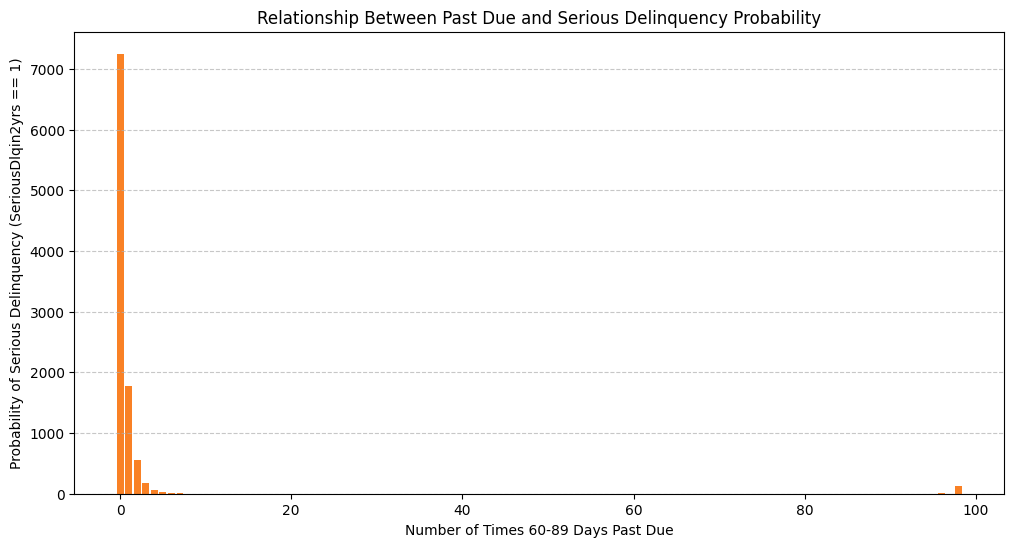

In [45]:
# Create a bar chart to visualize the relationship
plt.figure(figsize=(12, 6))
plt.bar(probability_by_past_due_60['NumberOfTime60-89DaysPastDueNotWorse'], probability_by_past_due_60['Count'],color=['#F98125'])
plt.xlabel('Number of Times 60-89 Days Past Due')
plt.ylabel('Probability of Serious Delinquency (SeriousDlqin2yrs == 1)')
plt.title('Relationship Between Past Due and Serious Delinquency Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Are borrowers who are 90 days past due on their payments likely to face serious delinquency?

In [46]:
# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
serious_delinquency_90 = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Group by the number of dependents and count the defaulted borrowers in each group
probability_by_past_due_90 = serious_delinquency_90['NumberOfTimes90DaysLate'].value_counts().reset_index()
probability_by_past_due_90.columns = ['NumberOfTimes90DaysLate', 'Count']
probability_by_past_due_90

,NumberOfTimes90DaysLate,Count
0,0,6549
1,1,1764
2,2,776
3,3,385
4,4,195
5,98,132
6,5,83
7,6,48
8,7,31
9,8,15


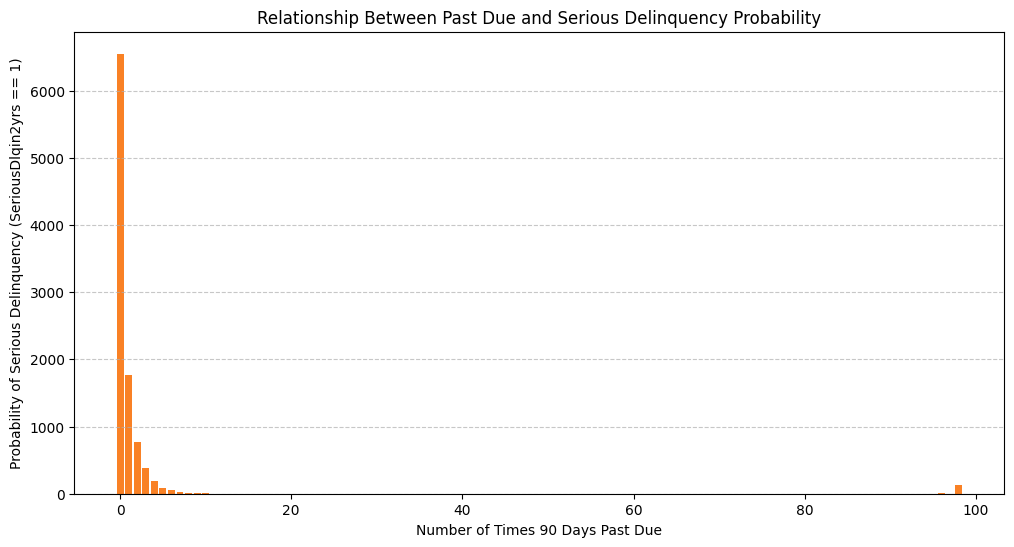

In [47]:
# Create a bar chart to visualize the relationship
plt.figure(figsize=(12, 6))
plt.bar(probability_by_past_due_90['NumberOfTimes90DaysLate'], probability_by_past_due_90['Count'],color=['#F98125'])
plt.xlabel('Number of Times 90 Days Past Due')
plt.ylabel('Probability of Serious Delinquency (SeriousDlqin2yrs == 1)')
plt.title('Relationship Between Past Due and Serious Delinquency Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

It can be seen that there are 132 persons in 3 previous features have past due 98 times.

How does the number of open credit lines and loans affect the probability of default?

In [48]:
# Filter the dataset to include only rows where SeriousDlqin2yrs is equal to 1 (serious delinquency)
serious_delinquency_open = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Define custom bins for categorizing the number of open credit lines and loans
open_credit_bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 60]

# Categorize 'NumberOfOpenCreditLinesAndLoans' into custom bins for the defaulted borrowers
serious_delinquency_open['OpenCreditLinesBins'] = pd.cut(serious_delinquency_open['NumberOfOpenCreditLinesAndLoans'], bins=open_credit_bins)

# Calculate the conditional probability of default within each bin
probability_by_open_credit = serious_delinquency_open['OpenCreditLinesBins'].value_counts().reset_index()
probability_by_open_credit.columns = ['OpenCreditLinesBins', 'Count']
probability_by_open_credit

C:\Users\tenzi\AppData\Local\Temp\ipykernel_55352\671449956.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serious_delinquency_open['OpenCreditLinesBins'] = pd.cut(serious_delinquency_open['NumberOfOpenCreditLinesAndLoans'], bins=open_credit_bins)


,OpenCreditLinesBins,Count
0,"(5, 10]",3345
1,"(10, 15]",1804
2,"(4, 5]",819
3,"(3, 4]",743
4,"(2, 3]",682
5,"(15, 20]",676
6,"(1, 2]",609
7,"(0, 1]",584
8,"(20, 30]",253
9,"(30, 40]",18


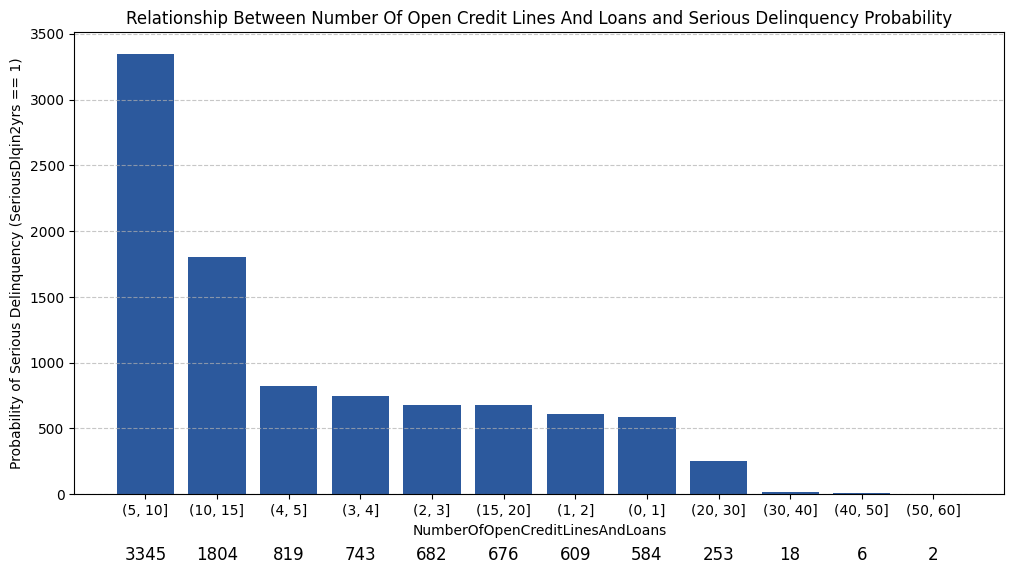

In [49]:
# Create a bar chart to visualize the relationship
probability_by_open_credit['OpenCreditLinesBins'] = probability_by_open_credit['OpenCreditLinesBins'].astype(str)
plt.figure(figsize=(12, 6))
plt.bar(probability_by_open_credit['OpenCreditLinesBins'], probability_by_open_credit['Count'],color='#2C599D')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Probability of Serious Delinquency (SeriousDlqin2yrs == 1)')
plt.title('Relationship Between Number Of Open Credit Lines And Loans and Serious Delinquency Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for k,v in probability_by_open_credit['Count'].items():
    plt.text(k,-500, str(v), fontsize=12,color='k', horizontalalignment='center')

plt.show()

Does having real estate loans or lines of credit impact a borrower's creditworthiness?

In [50]:
# Filter the dataset to include only rows where SeriousDlqin2yrs is equal to 1 (serious delinquency)
serious_delinquency = training_data[training_data['SeriousDlqin2yrs'] == 1]

# Create two groups: one with real estate loans and another without
with_real_estate = serious_delinquency[serious_delinquency['NumberRealEstateLoansOrLines'] > 0]
without_real_estate = serious_delinquency[serious_delinquency['NumberRealEstateLoansOrLines'] == 0]

# Calculate the conditional probability of serious delinquency for each group
probability_with_real_estate = len(with_real_estate) 
probability_without_real_estate = len(without_real_estate) 

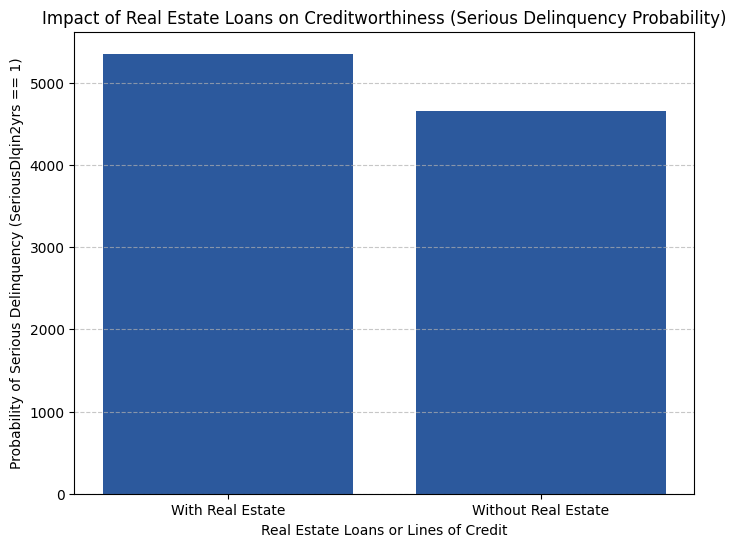

In [52]:
# Create a bar chart to visualize the relationship
plt.figure(figsize=(8, 6))
plt.bar(['With Real Estate', 'Without Real Estate'], [probability_with_real_estate, probability_without_real_estate], color='#2C599D')
plt.xlabel('Real Estate Loans or Lines of Credit')
plt.ylabel('Probability of Serious Delinquency (SeriousDlqin2yrs == 1)')
plt.title('Impact of Real Estate Loans on Creditworthiness (Serious Delinquency Probability)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Data Preprocessing

In [55]:
# copying the training data into df variable
df = training_data.copy()

In [170]:
# View the columns
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Handling the outliers for each feature

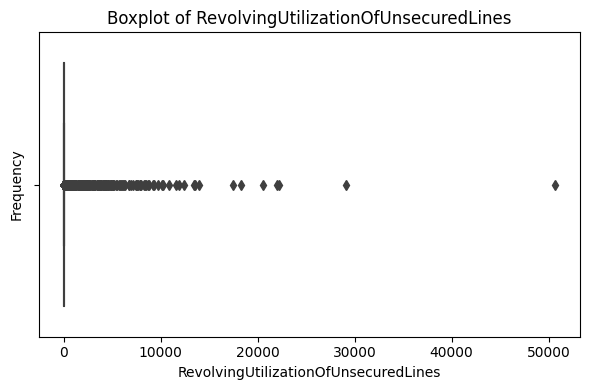

In [61]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='RevolvingUtilizationOfUnsecuredLines')
plt.title('Boxplot of RevolvingUtilizationOfUnsecuredLines')
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [68]:
count_above_1000 = (df['RevolvingUtilizationOfUnsecuredLines'] > 1.3).sum()
count_above_1000

833

In [172]:
# Create filtered_df
filtered_df = df[df['RevolvingUtilizationOfUnsecuredLines'] > 1.3]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

The rows with value having 1.3 has been dropped

In [173]:
count_above_1000 = (df['RevolvingUtilizationOfUnsecuredLines'] > 1.3).sum()
count_above_1000

0

RevolvingUtilizationOfUnsecuredLines (Boxplot)

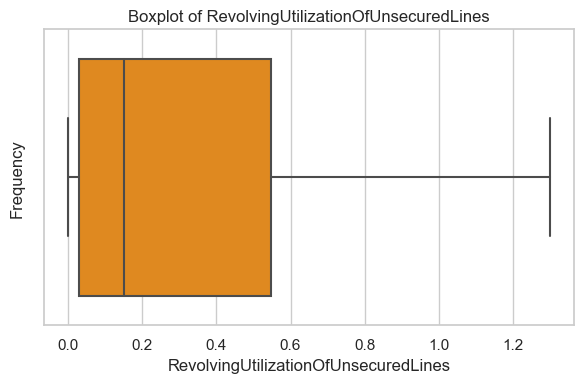

In [174]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='RevolvingUtilizationOfUnsecuredLines', color= 'darkorange')
plt.title('Boxplot of RevolvingUtilizationOfUnsecuredLines')
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [76]:
RevolvingUtilizationOfUnsecuredLines_cleaned =  df['RevolvingUtilizationOfUnsecuredLines'].shape
RevolvingUtilizationOfUnsecuredLines_original =  training_data['RevolvingUtilizationOfUnsecuredLines'].shape

print("RevolvingUtilizationOfUnsecuredLines_cleaned", RevolvingUtilizationOfUnsecuredLines_cleaned)
print("RevolvingUtilizationOfUnsecuredLines_original", RevolvingUtilizationOfUnsecuredLines_original)

RevolvingUtilizationOfUnsecuredLines_cleaned (148558,)
RevolvingUtilizationOfUnsecuredLines_original (149391,)


Boxplot for Age

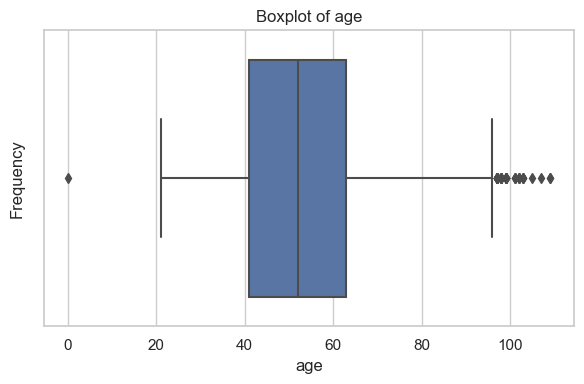

In [175]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='age')
plt.title('Boxplot of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

There is age value 0, which is a incorrect value and outlier can be seen for age more than 96. 

In [176]:
# Create filtered_df
filtered_df = df[(df['age'] > 96) | (df['age'] < 20)]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

In [177]:
count_ages = ((df['age'] > 96) | (df['age'] < 20)).sum()
count_ages

0

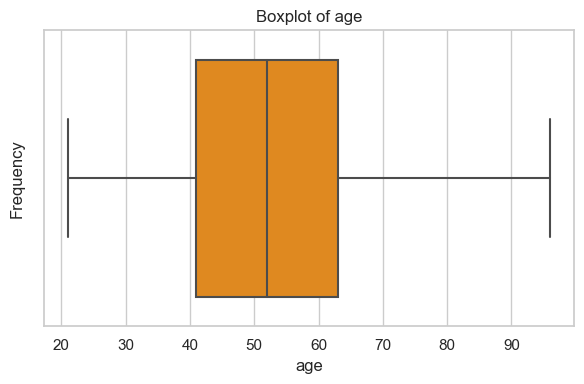

In [178]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='age', color = 'darkorange')
plt.title('Boxplot of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Boxplot of NumberOfTime30-59DaysPastDueNotWorse

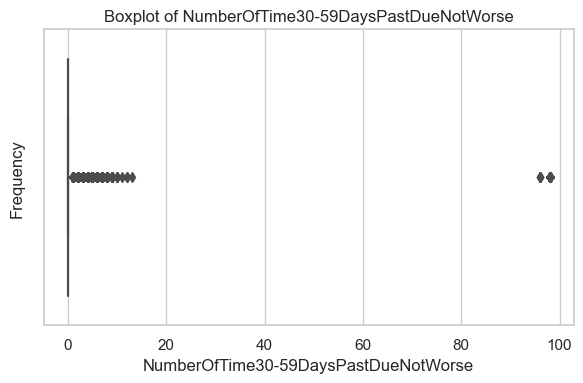

In [180]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfTime30-59DaysPastDueNotWorse')
plt.title('Boxplot of NumberOfTime30-59DaysPastDueNotWorse')
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [181]:
# Create filtered_df
filtered_df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] > 2]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

In [182]:
count_30 = ((df['NumberOfTime30-59DaysPastDueNotWorse'] > 2)).sum()
count_30

0

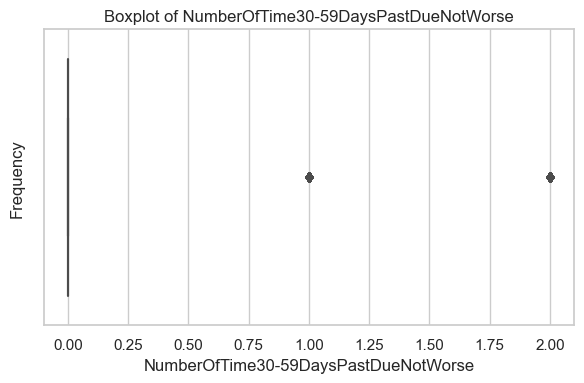

In [183]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfTime30-59DaysPastDueNotWorse')
plt.title('Boxplot of NumberOfTime30-59DaysPastDueNotWorse')
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Boxplot of DebtRatio

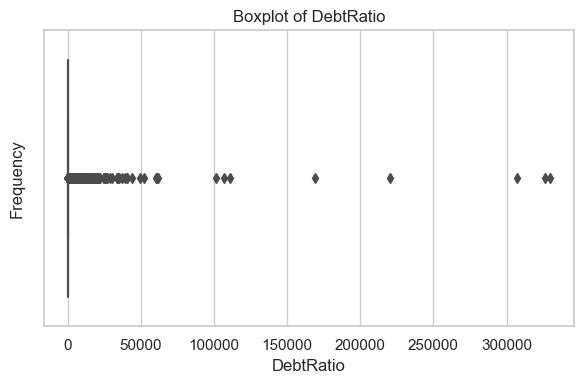

In [184]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='DebtRatio')
plt.title('Boxplot of DebtRatio')
plt.xlabel('DebtRatio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [185]:
count_dept = ((df['DebtRatio'] > 3300)).sum()
count_dept

4119

In [186]:
# Create filtered_df
filtered_df = df[df['DebtRatio'] > 3300]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

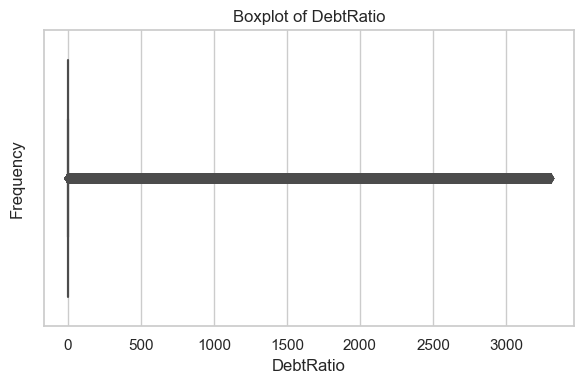

In [187]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='DebtRatio', color='darkorange')
plt.title('Boxplot of DebtRatio')
plt.xlabel('DebtRatio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Boxplot of MonthlyIncome

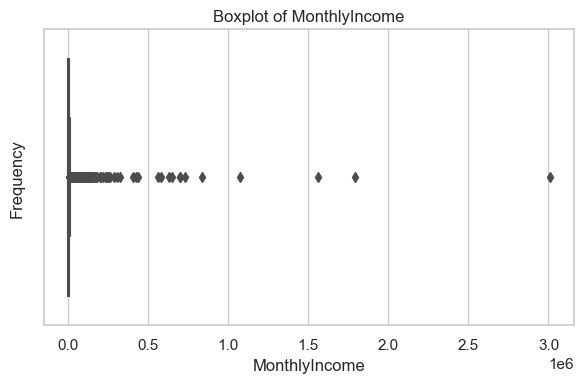

In [188]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='MonthlyIncome')
plt.title('Boxplot of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [189]:
count_income = ((df['MonthlyIncome'] > 15000)).sum()
count_income

5141

In [190]:
# Create filtered_df
filtered_df = df[df['MonthlyIncome'] > 15000]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

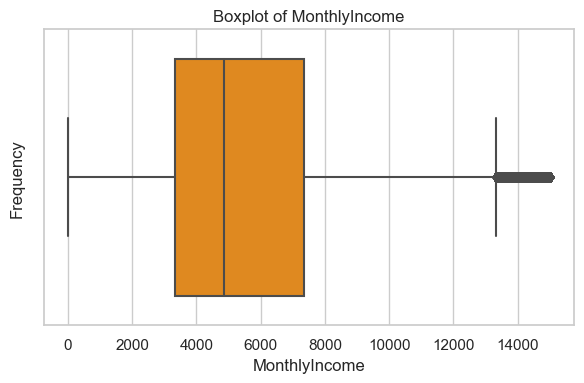

In [191]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='MonthlyIncome', color = 'darkorange')
plt.title('Boxplot of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Boxplot of NumberOfOpenCreditLinesAndLoans

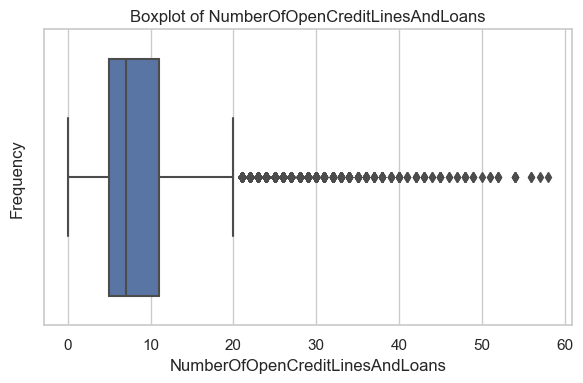

In [192]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfOpenCreditLinesAndLoans')
plt.title('Boxplot of NumberOfOpenCreditLinesAndLoans')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [193]:
count_openloans = ((df['NumberOfOpenCreditLinesAndLoans'] > 20)).sum()
count_openloans

3148

In [194]:
# Create filtered_df
filtered_df = df[df['NumberOfOpenCreditLinesAndLoans'] > 20]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

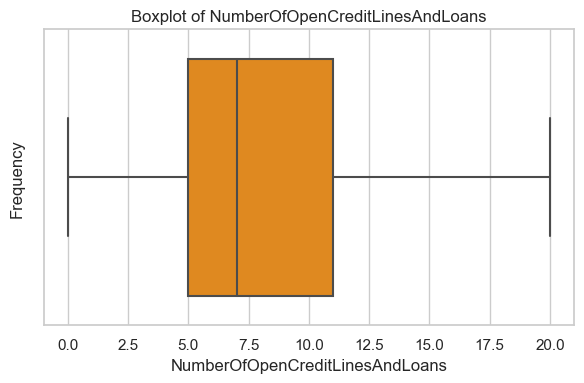

In [195]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfOpenCreditLinesAndLoans',color='darkorange')
plt.title('Boxplot of NumberOfOpenCreditLinesAndLoans')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Boxplot of NumberOfTimes90DaysLate

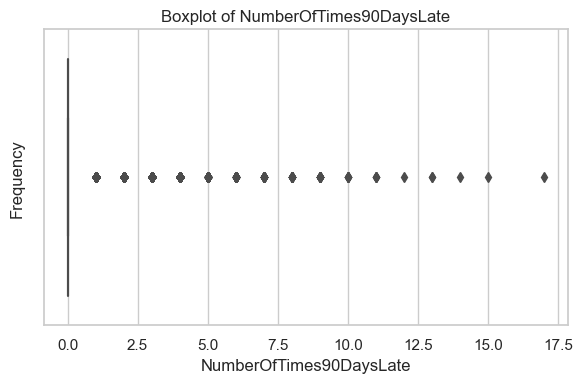

In [196]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfTimes90DaysLate')
plt.title('Boxplot of NumberOfTimes90DaysLate')
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [197]:
count_90 = ((df['NumberOfTimes90DaysLate'] >1)).sum()
count_90

2189

In [198]:
# Create filtered_df
filtered_df = df[df['NumberOfTimes90DaysLate'] > 1]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

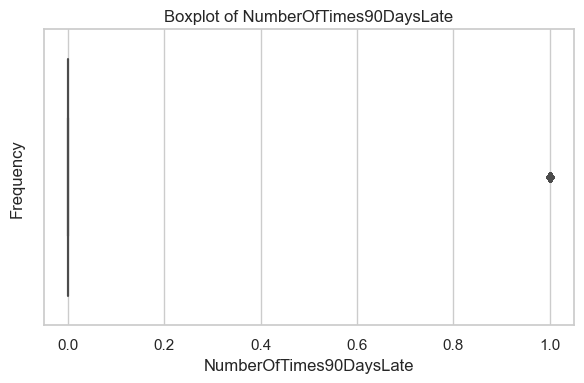

In [199]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfTimes90DaysLate')
plt.title('Boxplot of NumberOfTimes90DaysLate')
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [200]:
df['NumberOfTimes90DaysLate'].value_counts()


NumberOfTimes90DaysLate
0    126317
1      4357
Name: count, dtype: int64

Boxplot of NumberRealEstateLoansOrLines

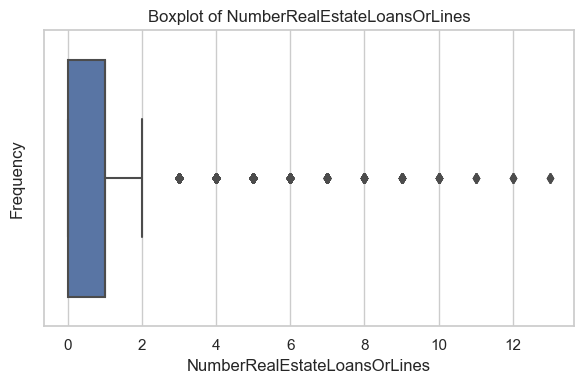

In [201]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberRealEstateLoansOrLines')
plt.title('Boxplot of NumberRealEstateLoansOrLines')
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [202]:
count_90 = ((df['NumberRealEstateLoansOrLines'] > 3)).sum()
count_90

2068

In [203]:
# Create filtered_df
filtered_df = df[df['NumberRealEstateLoansOrLines'] > 3]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

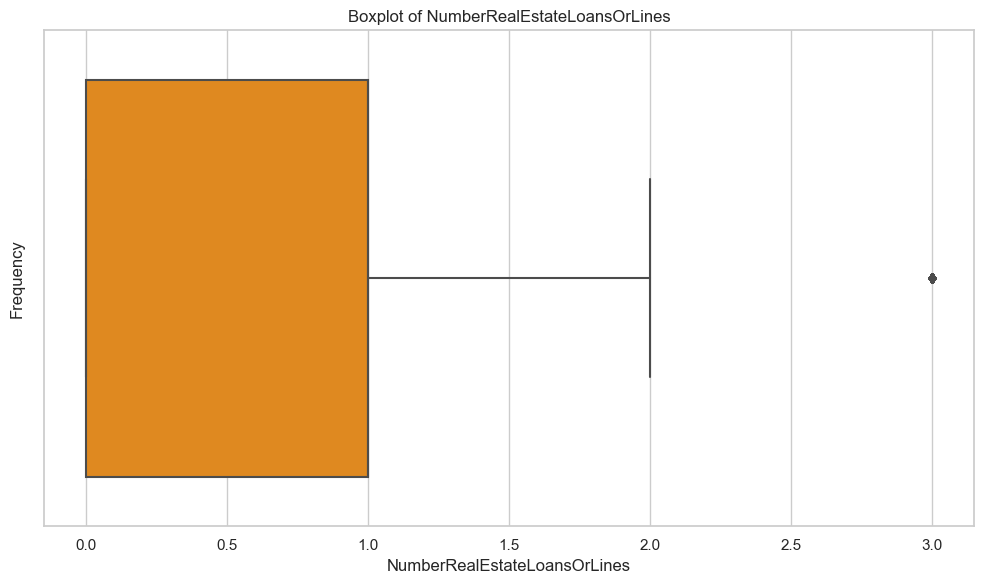

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NumberRealEstateLoansOrLines',color="darkorange")
plt.title('Boxplot of NumberRealEstateLoansOrLines')
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [205]:
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0    51363
1    47012
2    25818
3     4413
Name: count, dtype: int64

Boxplot of NumberOfTime60-89DaysPastDueNotWorse

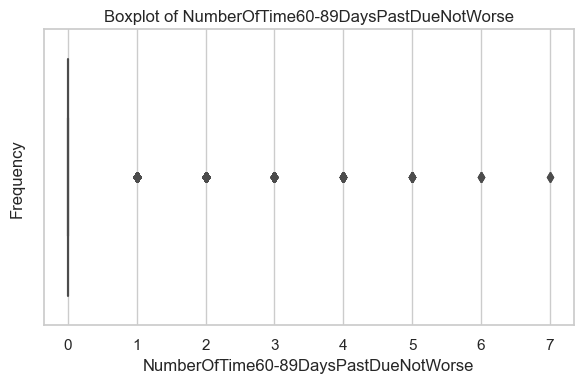

In [206]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfTime60-89DaysPastDueNotWorse')
plt.title('Boxplot of NumberOfTime60-89DaysPastDueNotWorse')
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [207]:
count_60 = ((df['NumberOfTime60-89DaysPastDueNotWorse'] > 1)).sum()
count_60

755

In [208]:
# Create filtered_df
filtered_df = df[df['NumberOfTime60-89DaysPastDueNotWorse'] > 1]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

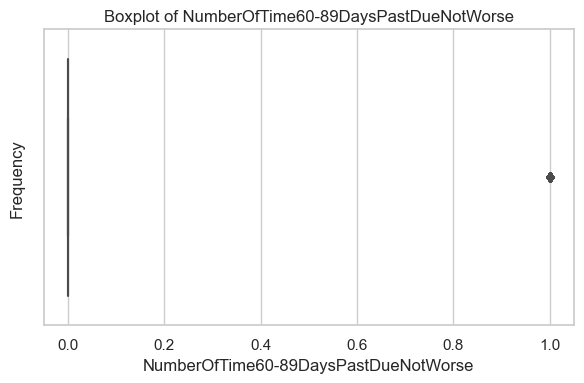

In [209]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfTime60-89DaysPastDueNotWorse')
plt.title('Boxplot of NumberOfTime60-89DaysPastDueNotWorse')
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [210]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()


NumberOfTime60-89DaysPastDueNotWorse
0    123873
1      3978
Name: count, dtype: int64

Boxplot of NumberOfDependents

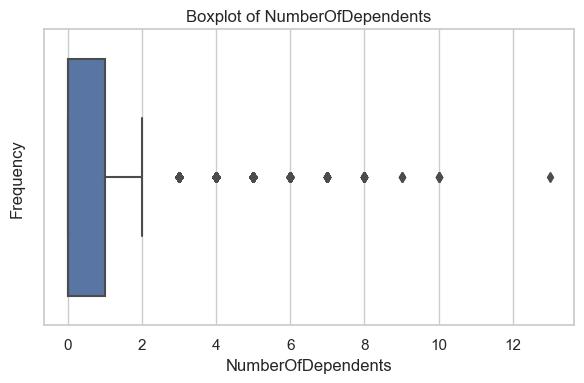

In [211]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfDependents')
plt.title('Boxplot of NumberOfDependents')
plt.xlabel('NumberOfDependents')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [212]:
count_dep = ((df['NumberOfDependents'] > 4)).sum()
count_dep

781

In [213]:
# Create filtered_df
filtered_df = df[df['NumberOfDependents'] > 4]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

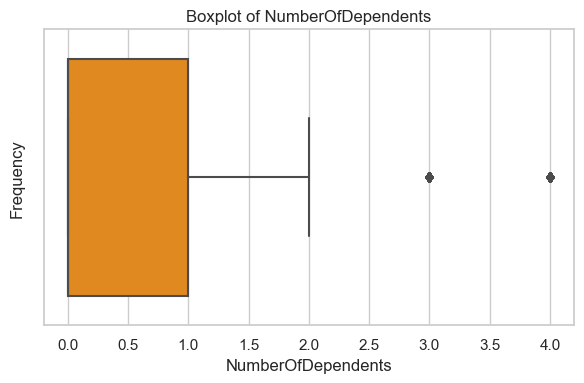

In [214]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfDependents',color='darkorange')
plt.title('Boxplot of NumberOfDependents')
plt.xlabel('NumberOfDependents')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [215]:
count_dep = ((df['NumberOfDependents'] > 3)).sum()
count_dep

2266

In [216]:
# Create filtered_df
filtered_df = df[df['NumberOfDependents'] > 3]

# Get the index values of rows to drop
rows_to_drop = filtered_df.index

# Drop rows from the original DataFrame where the condition is met
df.drop(rows_to_drop, inplace=True)

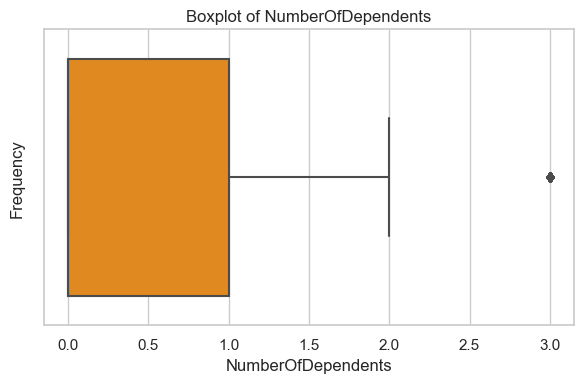

In [217]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NumberOfDependents',color='darkorange')
plt.title('Boxplot of NumberOfDependents')
plt.xlabel('NumberOfDependents')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Handling Imbalanced data on the target

In [218]:
# Split the data to train and test
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

In [219]:
y.value_counts()


SeriousDlqin2yrs
0    118930
1      5874
Name: count, dtype: int64

In [ ]:
df.drop(columns=['age_group','income_group'],inplace=True)              

The dataset is imbalanced and will be using SMOTE for oversampling imbalanced classification datasets

- Synthetic Minority Oversampling Technique (SMOTE)
- To know more about SMOTE and how it works (https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c)


<b>SMOTE algorithm:</b>

- Take difference between a sample and its nearest neighbour
- Multiply the difference by a random number between 0 and 1
- Add this difference to the sample to generate a new synthetic example in feature space
- Continue on with next nearest neighbour up to user-defined number

In [220]:
from imblearn.over_sampling import SMOTE


In [221]:
print(X.isnull().sum())


RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [222]:
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)  

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [223]:
y_resampled.value_counts()


SeriousDlqin2yrs
0    118930
1    118930
Name: count, dtype: int64

## Modelling

Splitting the dataset in to training and testing data set

- train : 80%
- test : 20%

In [224]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0, shuffle=True)

1. Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

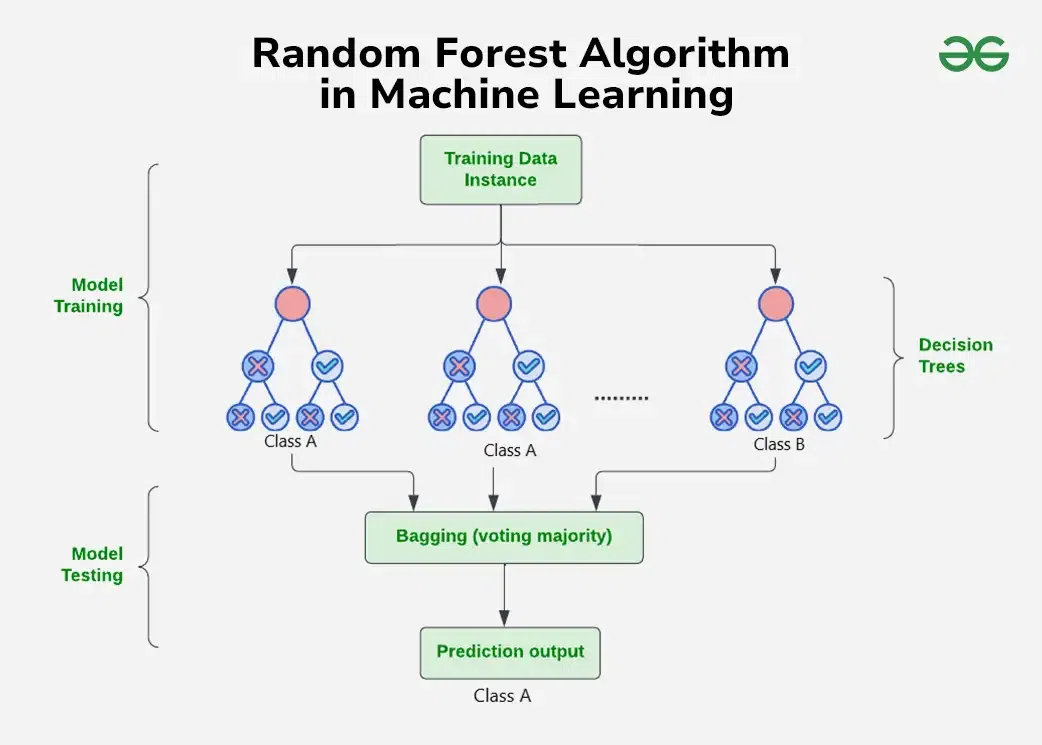

In [226]:
# Fitting the model
rf.fit(X_train,y_train)


RandomForestClassifier()

In [227]:
rf.score(X_train,y_train)


0.9997530059698982

In [228]:
rf.score(X_test,y_test)


0.918691667367359

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

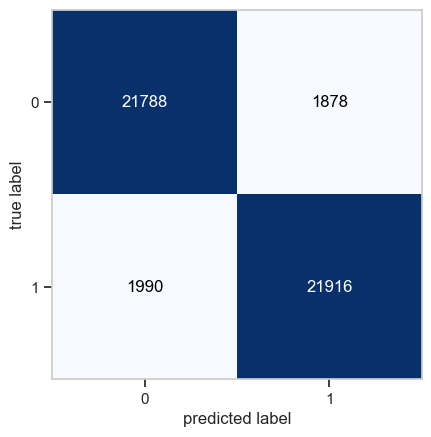

In [229]:
from sklearn.metrics import confusion_matrix, classification_report

con = confusion_matrix(y_test,rf.predict(X_test))

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con)


In [230]:
y_pred = rf.predict(X_test)


In [231]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92     23666
           1       0.92      0.92      0.92     23906

    accuracy                           0.92     47572
   macro avg       0.92      0.92      0.92     47572
weighted avg       0.92      0.92      0.92     47572



It seems like it is overfitting, the score for all is showing more than 90%

2. Decision Tree

In [234]:
X_train , X_test , y_train , y_test = train_test_split(X_resampled, y_resampled, test_size= 0.2, random_state =42,shuffle=True)


In [235]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()


In [236]:
dt.fit(X_train , y_train)


DecisionTreeClassifier()

In [237]:
dt.score(X_train,y_train)


0.9997424955856387

In [238]:
dt.score(X_test,y_test)


0.881758177078954

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

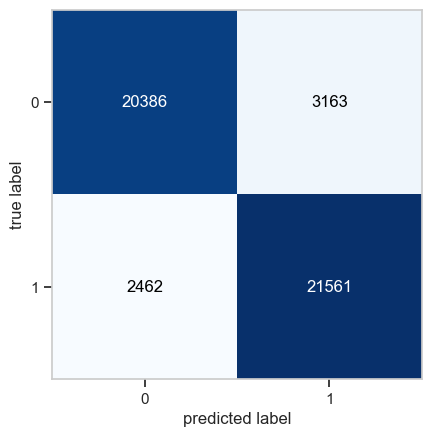

In [239]:
con = confusion_matrix(y_test,dt.predict(X_test))
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con)

In [240]:
y_pred = dt.predict(X_test)


In [241]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88     23549
           1       0.87      0.90      0.88     24023

    accuracy                           0.88     47572
   macro avg       0.88      0.88      0.88     47572
weighted avg       0.88      0.88      0.88     47572



In [242]:
x_train , x_test , y_train , y_test = train_test_split(X_resampled, y_resampled, test_size= 0.2)


In [245]:
from xgboost import XGBClassifier

xgb = XGBClassifier()


In [246]:
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [247]:
xgb.score(x_train,y_train)


0.8825727318590768

In [248]:
xgb.score(x_test,y_test)


0.8724669973934247

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

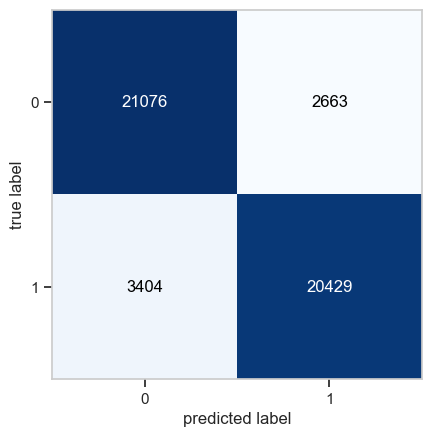

In [249]:
con = confusion_matrix(y_test,xgb.predict(x_test))

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con)

In [250]:
y_pred = xgb.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87     23739
           1       0.88      0.86      0.87     23833

    accuracy                           0.87     47572
   macro avg       0.87      0.87      0.87     47572
weighted avg       0.87      0.87      0.87     47572



Hyperparameter Tuning

1. Random Forest Hyperparameter Tuning
python


In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
